In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('911.csv')

In [3]:
df.shape

(99492, 9)

In [4]:
df.head()

,lat,lng,desc,zip,title,timeStamp,twp,addr,e
0,40.297876,-75.581294,REINDEER CT & DEAD END; NEW HANOVER; Station ...,19525.0,EMS: BACK PAINS/INJURY,2015-12-10 17:40:00,NEW HANOVER,REINDEER CT & DEAD END,1
1,40.258061,-75.264680,BRIAR PATH & WHITEMARSH LN; HATFIELD TOWNSHIP...,19446.0,EMS: DIABETIC EMERGENCY,2015-12-10 17:40:00,HATFIELD TOWNSHIP,BRIAR PATH & WHITEMARSH LN,1
2,40.121182,-75.351975,HAWS AVE; NORRISTOWN; 2015-12-10 @ 14:39:21-St...,19401.0,Fire: GAS-ODOR/LEAK,2015-12-10 17:40:00,NORRISTOWN,HAWS AVE,1
3,40.116153,-75.343513,AIRY ST & SWEDE ST; NORRISTOWN; Station 308A;...,19401.0,EMS: CARDIAC EMERGENCY,2015-12-10 17:40:01,NORRISTOWN,AIRY ST & SWEDE ST,1
4,40.251492,-75.603350,CHERRYWOOD CT & DEAD END; LOWER POTTSGROVE; S...,NaN,EMS: DIZZINESS,2015-12-10 17:40:01,LOWER POTTSGROVE,CHERRYWOOD CT & DEAD END,1


In [5]:
df['zip'].value_counts().head()

19401.0    6979
19464.0    6643
19403.0    4854
19446.0    4748
19406.0    3174
Name: zip, dtype: int64

In [6]:
df['twp'].value_counts().head()

LOWER MERION    8443
ABINGTON        5977
NORRISTOWN      5890
UPPER MERION    5227
CHELTENHAM      4575
Name: twp, dtype: int64

In [7]:
df['title'].nunique()

110

In [8]:
df['reason'] = df['title'].apply(lambda x: x.split(':')[0])

In [9]:
df['reason'].value_counts()

EMS        48877
Traffic    35695
Fire       14920
Name: reason, dtype: int64

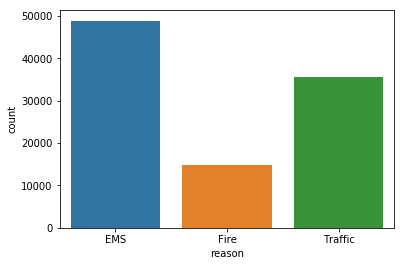

In [10]:
sns.countplot(x='reason', data=df)

In [11]:
df['timeStamp'] = pd.to_datetime(df['timeStamp'])

In [12]:
df['hour'] = df['timeStamp'].apply(lambda x: x.hour)
df['month'] = df['timeStamp'].apply(lambda x: x.month)
df['day of week'] = df['timeStamp'].apply(lambda x: x.dayofweek)

In [13]:
dmap = {0:'Mon', 1:'Tue', 2:'Wed', 3:'Thu', 4:'Fri', 5:'Sat', 6:'Sun'}

In [14]:
df['day of week'] = df['day of week'].map(dmap)

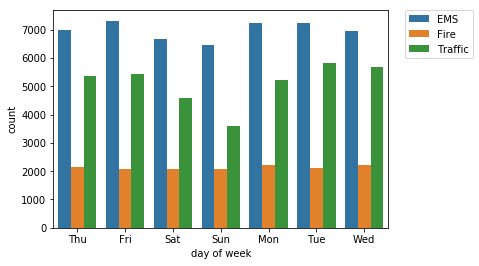

In [15]:
sns.countplot(x='day of week', data=df, hue='reason')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0)

In [16]:
byMonth = df.groupby('month').count()

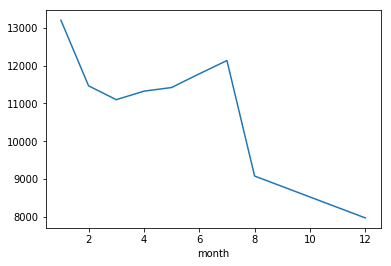

In [17]:
byMonth['lat'].plot()

/Users/sudeng/anaconda3/lib/python3.7/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


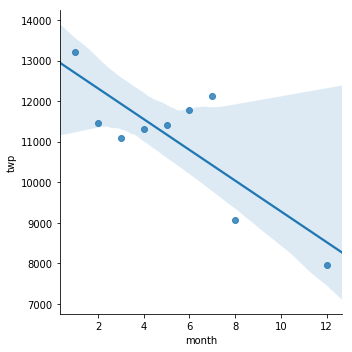

In [18]:
sns.lmplot(x='month', y='twp', data=byMonth.reset_index())

In [19]:
df['date'] = df['timeStamp'].apply(lambda x: x.date())

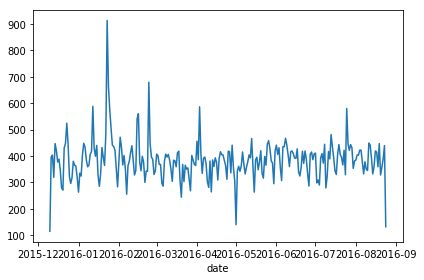

In [20]:
df.groupby('date').count()['lat'].plot()
plt.tight_layout()

Text(0.5,1,'Traffic')

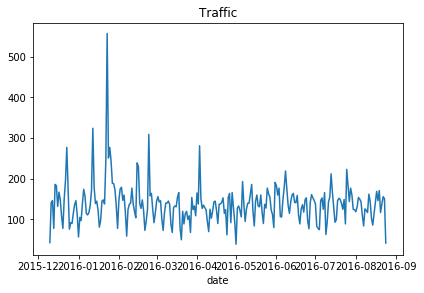

In [21]:
df[df['reason'] == 'Traffic'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Traffic')

Text(0.5,1,'Fire')

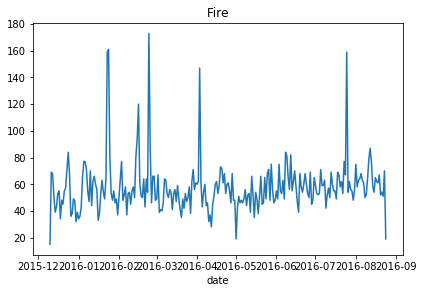

In [22]:
df[df['reason'] == 'Fire'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('Fire')

Text(0.5,1,'EMS')

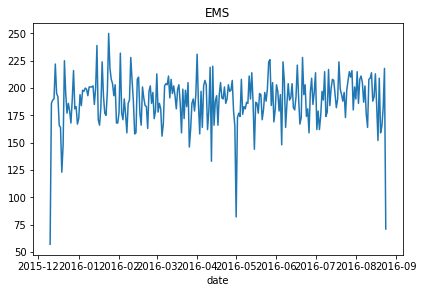

In [23]:
df[df['reason'] == 'EMS'].groupby('date').count()['lat'].plot()
plt.tight_layout()
plt.title('EMS')

In [24]:
dayHour = df.groupby(by=['day of week', 'hour']).count()['reason'].unstack()

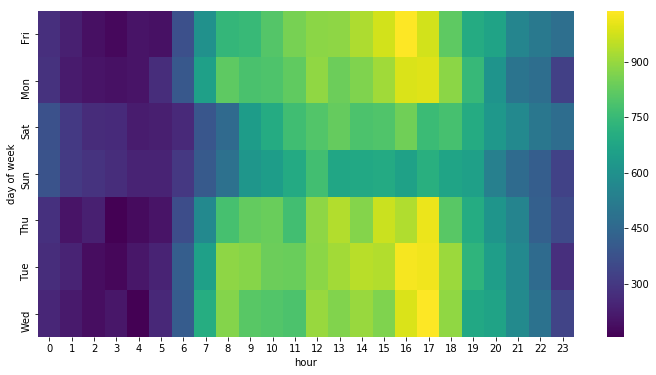

In [25]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayHour, cmap='viridis')

In [26]:
dayMonth = df.groupby(by=['day of week', 'month']).count()['reason'].unstack()

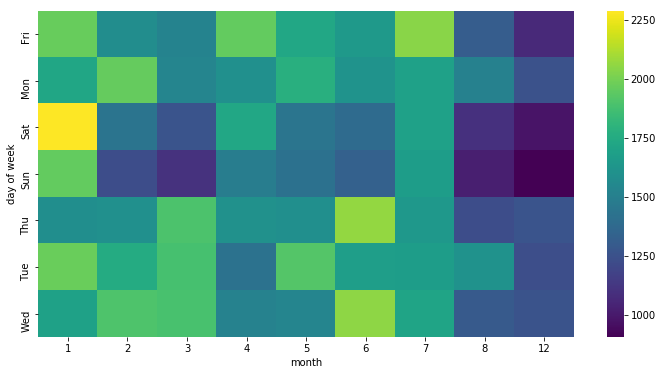

In [27]:
plt.figure(figsize=(12, 6))
sns.heatmap(dayMonth, cmap='viridis')

In [28]:
!!jupyter nbconvert *.ipynb

['[NbConvertApp] Converting notebook 911 calls project.ipynb to html',
 '[NbConvertApp] Writing 526188 bytes to 911 calls project.html']